In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
from pathlib import Path

# Path to your downloaded TACO dataset zip file
zip_file_path = Path("/content/drive/MyDrive/TACO.zip")
extract_dir = Path("./TACO")

# Create the target directory
os.makedirs(extract_dir, exist_ok=True)


# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir.resolve()}")

Dataset extracted to: /content/TACO


In [ ]:
import json
import pandas as pd
from pathlib import Path

# Define ANNOTATIONS_PATH correctly, assuming TACO has been extracted to ./TACO/TACO/data
ANNOTATIONS_PATH = Path("./TACO") / "TACO" / "data" / "annotations.json"
IMAGES_DIR = Path("./TACO") / "TACO" / "data" # Corrected IMAGES_DIR to point directly to the data folder containing batch_X folders

with open(ANNOTATIONS_PATH, "r") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
categories_df = pd.DataFrame(coco["categories"])
annotations_df = pd.DataFrame(coco["annotations"])



print("Images:", len(images_df))
print("Categories:", len(categories_df))
print("Annotations:", len(annotations_df))
categories_df.head()

Images: 715
Categories: 60
Annotations: 2152


,supercategory,id,name
0,Aluminium foil,0,Aluminium foil
1,Battery,1,Battery
2,Blister pack,2,Aluminium blister pack
3,Blister pack,3,Carded blister pack
4,Bottle,4,Other plastic bottle


In [ ]:
print("Unique supercategories in categories_df:")
display(categories_df['supercategory'].unique())

Unique supercategories in categories_df:


array(['Aluminium foil', 'Battery', 'Blister pack', 'Bottle',
       'Bottle cap', 'Broken glass', 'Can', 'Carton', 'Cup', 'Food waste',
       'Glass jar', 'Lid', 'Other plastic', 'Paper', 'Paper bag',
       'Plastic bag & wrapper', 'Plastic container', 'Plastic glooves',
       'Plastic utensils', 'Pop tab', 'Rope & strings', 'Scrap metal',
       'Shoe', 'Squeezable tube', 'Straw', 'Styrofoam piece',
       'Unlabeled litter', 'Cigarette'], dtype=object)

In [ ]:
# Keep only annotations with valid image_id and category_id references
valid_image_ids = set(images_df["id"].tolist())
valid_category_ids = set(categories_df["id"].tolist())

clean_ann = annotations_df[
    annotations_df["image_id"].isin(valid_image_ids) &
    annotations_df["category_id"].isin(valid_category_ids)
].copy()

# Remove annotations with missing bbox or segmentation
clean_ann = clean_ann.dropna(subset=["bbox", "segmentation"])

# Some COCO fields might be empty lists; filter those out
clean_ann = clean_ann[clean_ann["segmentation"].apply(lambda s: isinstance(s, list) and len(s) > 0)]
clean_ann = clean_ann[clean_ann["bbox"].apply(lambda b: isinstance(b, list) and len(b) == 4)]

# Map category names
id_to_cat = dict(zip(categories_df["id"], categories_df["name"]))
clean_ann["category_name"] = clean_ann["category_id"].map(id_to_cat)

# Count per category
cat_counts = clean_ann["category_name"].value_counts()
# Filter to top-k categories for stable training (e.g., min 50 annotations)
min_count = 50
keep_cats = cat_counts[cat_counts >= min_count].index.tolist()
clean_ann = clean_ann[clean_ann["category_name"].isin(keep_cats)]

print("Remaining categories:", len(keep_cats))
print(cat_counts[keep_cats].sort_values(ascending=False).head(10))

Remaining categories: 10
category_name
Cigarette                325
Unlabeled litter         191
Plastic drink bottle     158
Plastic Film             146
Other plastic            131
Drink can                128
Plastic bottle cap       103
Other plastic wrapper     81
Pop tab                   57
Plastic straw             57
Name: count, dtype: int64


In [ ]:
import json
import pandas as pd
from pathlib import Path

# Define ANNOTATIONS_PATH correctly, assuming TACO has been extracted to ./TACO/TACO/data
ANNOTATIONS_PATH = Path("./TACO") / "TACO" / "data" / "annotations.json"
IMAGES_DIR = Path("./TACO") / "TACO" / "data" # Corrected IMAGES_DIR to point directly to the data folder containing batch_X folders

print(f"Attempting to open annotations from: {ANNOTATIONS_PATH.resolve()}")
with open(ANNOTATIONS_PATH, "r") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
categories_df = pd.DataFrame(coco["categories"])
annotations_df = pd.DataFrame(coco["annotations"])


print("Images:", len(images_df))
print("Categories:", len(categories_df))
print("Annotations:", len(annotations_df))
display(categories_df.head())

Attempting to open annotations from: /content/TACO/TACO/data/annotations.json
Images: 715
Categories: 60
Annotations: 2152


,supercategory,id,name
0,Aluminium foil,0,Aluminium foil
1,Battery,1,Battery
2,Blister pack,2,Aluminium blister pack
3,Blister pack,3,Carded blister pack
4,Bottle,4,Other plastic bottle


In [ ]:
# Keep only annotations with valid image_id and category_id references
valid_image_ids = set(images_df["id"].tolist())
valid_category_ids = set(categories_df["id"].tolist())

clean_ann = annotations_df[
    annotations_df["image_id"].isin(valid_image_ids) &
    annotations_df["category_id"].isin(valid_category_ids)
].copy()

# Remove annotations with missing bbox or segmentation
clean_ann = clean_ann.dropna(subset=["bbox", "segmentation"])

# Some COCO fields might be empty lists; filter those out
clean_ann = clean_ann[clean_ann["segmentation"].apply(lambda s: isinstance(s, list) and len(s) > 0)]
clean_ann = clean_ann[clean_ann["bbox"].apply(lambda b: isinstance(b, list) and len(b) == 4)]

# Map category names
id_to_cat = dict(zip(categories_df["id"], categories_df["name"]))
clean_ann["category_name"] = clean_ann["category_id"].map(id_to_cat)

# Count per category
cat_counts = clean_ann["category_name"].value_counts()
# Filter to top-k categories for stable training (e.g., min 50 annotations)
min_count = 50
keep_cats = cat_counts[cat_counts >= min_count].index.tolist()
clean_ann = clean_ann[clean_ann["category_name"].isin(keep_cats)]

print("Remaining categories:", len(keep_cats))
display(cat_counts[keep_cats].sort_values(ascending=False).head(10))

Remaining categories: 10


,count
category_name,
Cigarette,325
Unlabeled litter,191
Plastic drink bottle,158
Plastic Film,146
Other plastic,131
Drink can,128
Plastic bottle cap,103
Other plastic wrapper,81
Pop tab,57


In [ ]:
import numpy as np
import cv2
from PIL import Image # Ensure PIL is imported if used elsewhere

def extract_features_for_ann(ann):
    try:
        img_info = images_df[images_df["id"] == ann["image_id"]].iloc[0]
        img_path = IMAGES_DIR / img_info["file_name"]

        if not img_path.exists():
            return None

        img = cv2.imread(str(img_path))
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        x, y, w, h = ann["bbox"]
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Clamp bbox to image size
        h_img, w_img = img.shape[:2]
        x = max(0, min(x, w_img-1))
        y = max(0, min(y, h_img-1))
        w = max(1, min(w, w_img-x))
        h = max(1, min(h, h_img-y))

        crop = img[y:y+h, x:x+w]
        if crop.size == 0:
            return None

        crop_resized = cv2.resize(crop, (128, 128))

        # HSV histograms
        hsv = cv2.cvtColor(crop_resized, cv2.COLOR_RGB2HSV)
        hist_h = cv2.calcHist([hsv],[0],None,[32],[0,180]).flatten()
        hist_s = cv2.calcHist([hsv],[1],None,[32],[0,256]).flatten()
        hist_v = cv2.calcHist([hsv],[2],None,[32],[0,256]).flatten()
        hist = np.concatenate([hist_h, hist_s, hist_v])
        hist = hist / (np.sum(hist) + 1e-6)

        # Texture (Laplacian variance)
        gray = cv2.cvtColor(crop_resized, cv2.COLOR_RGB2GRAY)
        lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()

        # Size features
        area = w * h
        aspect = w / (h + 1e-6)

        return np.concatenate([hist, [lap_var, area, aspect]])
    except Exception as e:
        print("Error extracting features:", e)
        return None

In [ ]:
import numpy as np
import pandas as pd
import cv2

# Build feature dataset
rows = []
for idx, ann in clean_ann.iterrows():
    feats = extract_features_for_ann(ann)
    if feats is None:
        continue
    rows.append({
        "features": feats,
        "label": ann["category_name"]
    })

feat_df = pd.DataFrame(rows)
print("Feature rows:", len(feat_df))

# Check if feat_df is empty before proceeding
if feat_df.empty:
    raise ValueError("No features were extracted. feat_df is empty.")

X = np.stack(feat_df["features"].values)

# Convert categorical labels 'y' to numerical for plotting with plt.scatter
# This ensures 'c=y' in plt.scatter works as expected with a colormap.
unique_labels = feat_df["label"].unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y = feat_df["label"].map(label_to_int).values

print("Feature matrix shape:", X.shape)
print("Number of labels:", len(set(y)))

Feature rows: 1377
Feature matrix shape: (1377, 99)
Number of labels: 10


PCA shape: (1377, 2)


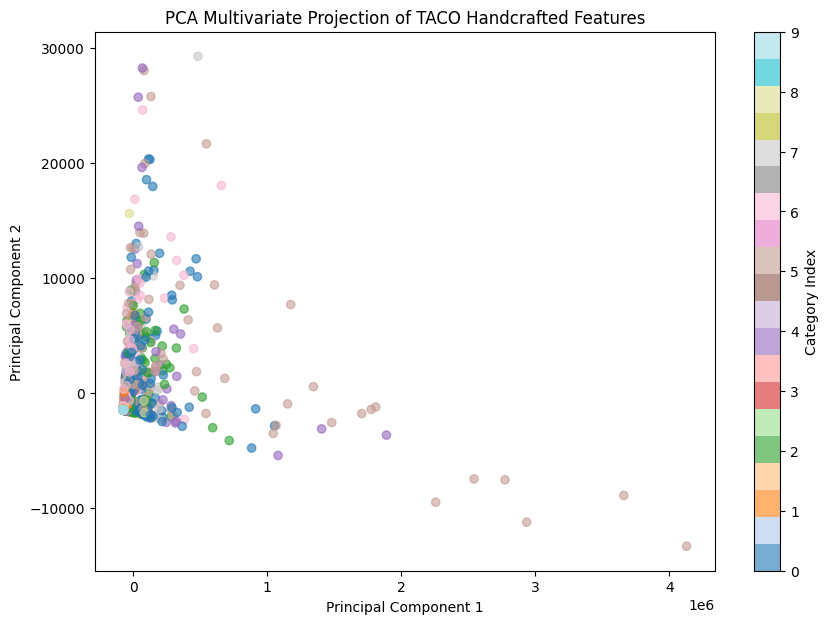

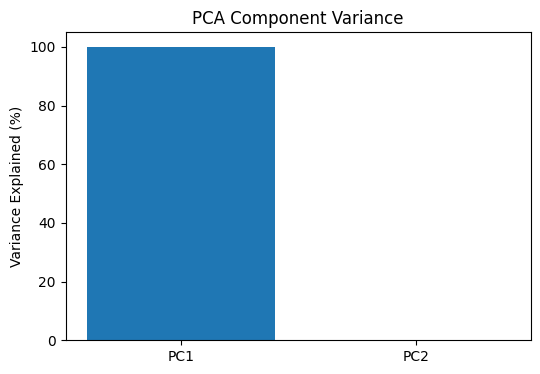

In [ ]:
# ----- MULTIVARIATE PCA ANALYSIS -----
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA on the full feature matrix
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA shape:", X_pca.shape)

plt.figure(figsize=(10, 7))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y, # Use the numerical labels 'y' created in the previous step
    cmap="tab20", # A good colormap for categorical data
    alpha=0.6
)
plt.title("PCA Multivariate Projection of TACO Handcrafted Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Category Index")
plt.show()

# Optional: explained variance
plt.figure(figsize=(6,4))
plt.bar(["PC1","PC2"], pca.explained_variance_ratio_ * 100)
plt.ylabel("Variance Explained (%)")
plt.title("PCA Component Variance")
plt.show()

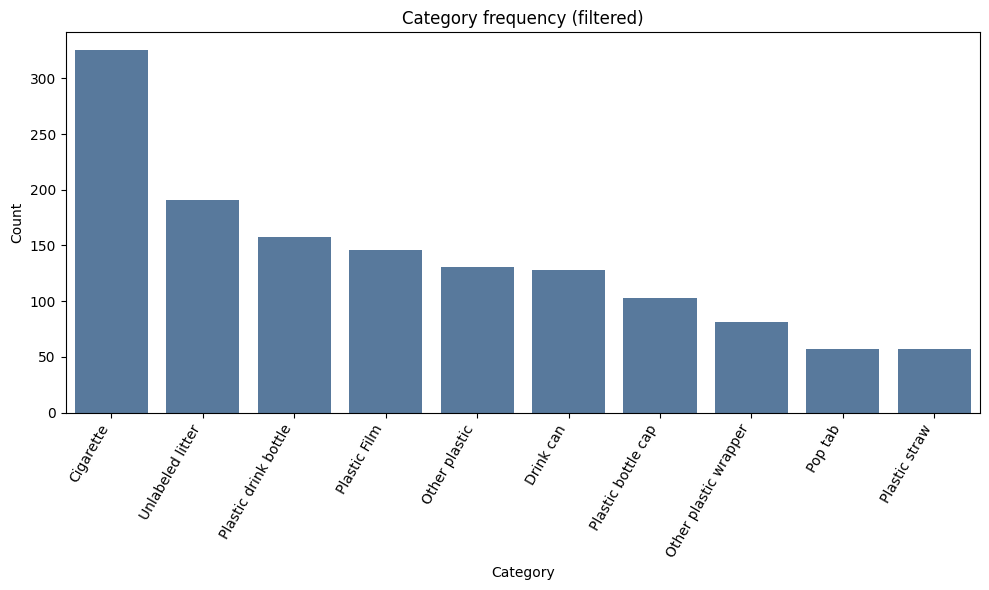

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_counts[keep_cats].sort_values(ascending=False).index,
            y=cat_counts[keep_cats].sort_values(ascending=False).values, color="#4C78A8")
plt.xticks(rotation=60, ha="right")
plt.title("Category frequency (filtered)")
plt.ylabel("Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

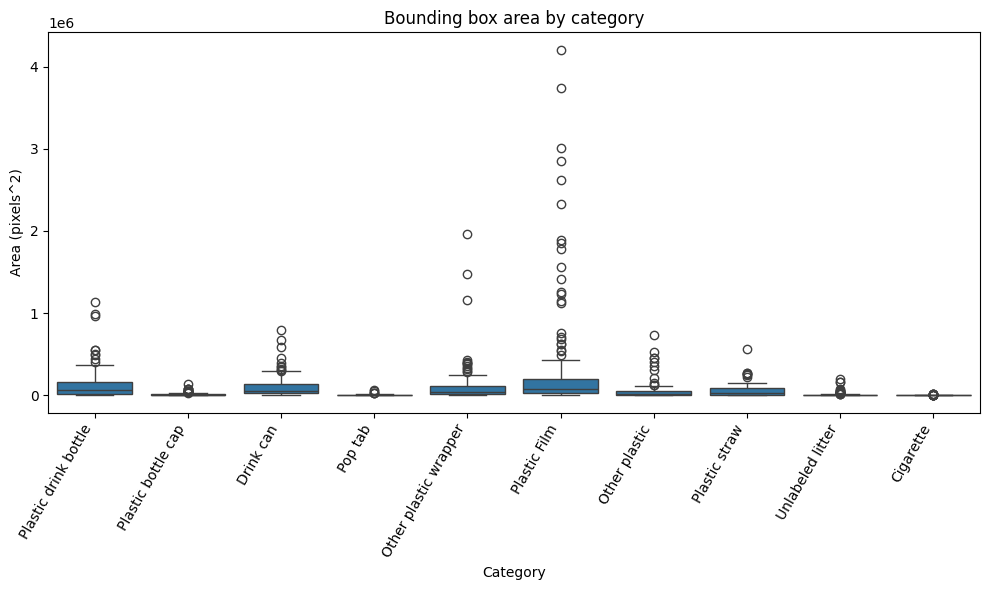

In [ ]:
clean_ann["bbox_area"] = clean_ann["bbox"].apply(lambda b: b[2] * b[3])  # width * height

plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_ann, x="category_name", y="bbox_area")
plt.xticks(rotation=60, ha="right")
plt.title("Bounding box area by category")
plt.ylabel("Area (pixels^2)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

In [ ]:
def show_sample_with_bbox(n=3):
    sample_anns = clean_ann.sample(n)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

    for ax, (_, ann) in zip(axes, sample_anns.iterrows()):
        try:
            # Get image info
            img_info = images_df[images_df["id"] == ann["image_id"]].iloc[0]
            img_path = IMAGES_DIR / img_info["file_name"]

            if not img_path.exists():
                ax.set_title("Image not found")
                ax.axis("off")
                continue

            # Load image
            img = np.array(Image.open(img_path).convert("RGB"))

            # Draw bounding box
            x, y, w, h = ann["bbox"]
            x, y, w, h = int(x), int(y), int(w), int(h)

            # Validate bbox
            if w <= 0 or h <= 0:
                ax.imshow(img)
                ax.set_title(f'{ann["category_name"]} (invalid bbox)')
                ax.axis("off")
                continue

            img_overlay = img.copy()
            cv2.rectangle(img_overlay, (x, y), (x+w, y+h), (255, 0, 0), 3)

            ax.imshow(img_overlay)
            ax.set_title(f'{ann["category_name"]}')
            ax.axis("off")

        except Exception as e:
            ax.set_title(f"Error: {e}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
def extract_features_for_ann(ann):
    try:
        img_info = images_df[images_df["id"] == ann["image_id"]].iloc[0]
        img_path = IMAGES_DIR / img_info["file_name"]

        if not img_path.exists():
            return None

        img = cv2.imread(str(img_path))
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        x, y, w, h = ann["bbox"]
        x, y, w, h = int(x), int(y), int(w), int(h)

        # Clamp bbox to image size
        h_img, w_img = img.shape[:2]
        x = max(0, min(x, w_img-1))
        y = max(0, min(y, h_img-1))
        w = max(1, min(w, w_img-x))
        h = max(1, min(h, h_img-y))

        crop = img[y:y+h, x:x+w]
        if crop.size == 0:
            return None

        crop_resized = cv2.resize(crop, (128, 128))

        # HSV histograms
        hsv = cv2.cvtColor(crop_resized, cv2.COLOR_RGB2HSV)
        hist_h = cv2.calcHist([hsv],[0],None,[32],[0,180]).flatten()
        hist_s = cv2.calcHist([hsv],[1],None,[32],[0,256]).flatten()
        hist_v = cv2.calcHist([hsv],[2],None,[32],[0,256]).flatten()
        hist = np.concatenate([hist_h, hist_s, hist_v])
        hist = hist / (np.sum(hist) + 1e-6)

        # Texture (Laplacian variance)
        gray = cv2.cvtColor(crop_resized, cv2.COLOR_RGB2GRAY)
        lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()

        # Size features
        area = w * h
        aspect = w / (h + 1e-6)

        return np.concatenate([hist, [lap_var, area, aspect]])
    except Exception as e:
        print("Error extracting features:", e)
        return None

In [ ]:
import os
os.listdir('/content/TACO/TACO/data/')

['batch_5',
 'batch_2',
 'batch_6',
 'batch_7',
 'batch_1',
 '.DS_Store',
 'batch_3',
 'batch_4',
 'annotations.json']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2

# Build feature dataset
rows = []
for idx, ann in clean_ann.iterrows():
    feats = extract_features_for_ann(ann)
    if feats is None:
        continue
    rows.append({
        "features": feats,
        "label": ann["category_name"]
    })

feat_df = pd.DataFrame(rows)
print("Feature rows:", len(feat_df))

# Check if feat_df is empty before proceeding
if feat_df.empty:
    raise ValueError("No features were extracted. feat_df is empty.")

X = np.stack(feat_df["features"].values)
y = feat_df["label"].values

print("Feature matrix shape:", X.shape)
print("Number of labels:", len(set(y)))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Feature rows: 1377
Feature matrix shape: (1377, 99)
Number of labels: 10


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogReg accuracy: 0.37318840579710144
                       precision    recall  f1-score   support

            Cigarette       0.50      0.71      0.59        65
            Drink can       0.31      0.15      0.21        26
        Other plastic       0.24      0.23      0.24        26
Other plastic wrapper       0.00      0.00      0.00        16
         Plastic Film       0.31      0.34      0.33        29
   Plastic bottle cap       0.40      0.19      0.26        21
 Plastic drink bottle       0.33      0.41      0.37        32
        Plastic straw       0.40      0.17      0.24        12
              Pop tab       0.14      0.09      0.11        11
     Unlabeled litter       0.35      0.45      0.40        38

             accuracy                           0.37       276
            macro avg       0.30      0.27      0.27       276
         weighted avg       0.34      0.37      0.35       276

RF accuracy: 0.4420289855072464
                       precision    recall  f1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


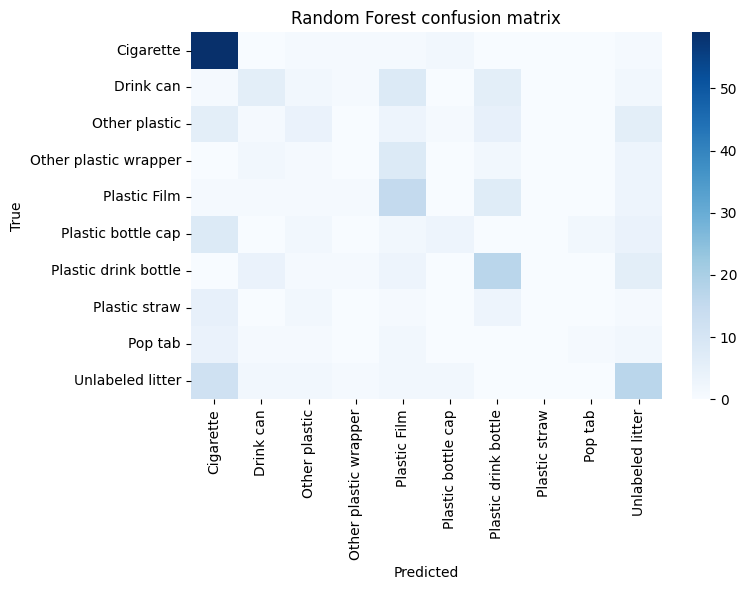

In [ ]:
# Logistic Regression pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=200, multi_class="multinomial"))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
print("LogReg accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("RF accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

# Confusion matrix for RF
cm = confusion_matrix(y_val, y_pred_rf, labels=sorted(set(y)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title("Random Forest confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 73.7MB/s]


Epoch 1: train_loss=1.9336 acc=0.348 | val_loss=1.8099 acc=0.384


Epoch 2: train_loss=1.6351 acc=0.415 | val_loss=1.7536 acc=0.409


Epoch 3: train_loss=1.4461 acc=0.510 | val_loss=1.6921 acc=0.417


Epoch 4: train_loss=1.3150 acc=0.550 | val_loss=1.8219 acc=0.399


Epoch 5: train_loss=1.1735 acc=0.580 | val_loss=2.0491 acc=0.417


Epoch 6: train_loss=1.0581 acc=0.633 | val_loss=2.0165 acc=0.388


Epoch 7: train_loss=0.9280 acc=0.668 | val_loss=1.9560 acc=0.431


Epoch 8: train_loss=0.7775 acc=0.718 | val_loss=1.9007 acc=0.435
                       precision    recall  f1-score   support

            Cigarette       0.69      0.77      0.73        65
            Drink can       0.40      0.23      0.29        26
        Other plastic       0.31      0.31      0.31        26
Other plastic wrapper       0.09      0.12      0.11        16
         Plastic Film       0.47      0.55      0.51        29
   Plastic bottle cap       0.35      0.29      0.32        21
 Plastic drink bottle       0.39      0.41      0.40        32
        Plastic straw       0.40      0.33      0.36        12
              Pop tab       0.12      0.09      0.11        11
     Unlabeled litter       0.36      0.37      0.36        38

             accuracy                           0.43       276
            macro avg       0.36      0.35      0.35       276
         weighted avg       0.43      0.43      0.43       276



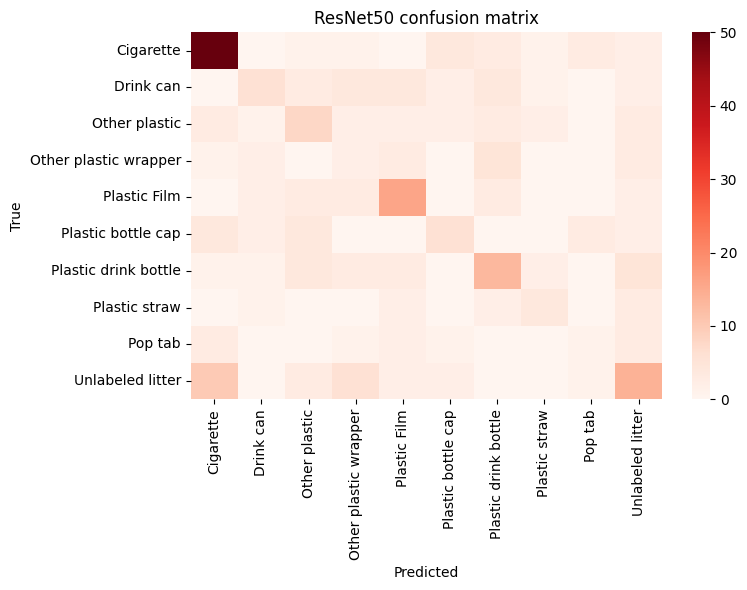

In [ ]:
# Prepare dataset for NN using albumentations for augmentation
label_to_idx = {label: i for i, label in enumerate(sorted(set(y)))}
idx_to_label = {v: k for k, v in label_to_idx.items()}

class TacoBBoxDataset(Dataset):
    def __init__(self, ann_df, images_df, transform=None):
        self.ann_df = ann_df.reset_index(drop=True)
        self.images_df = images_df.set_index("id")
        self.transform = transform

    def __len__(self):
        return len(self.ann_df)

    def __getitem__(self, i):
        ann = self.ann_df.iloc[i]
        img_info = self.images_df.loc[ann["image_id"]]
        img_path = IMAGES_DIR / img_info["file_name"]
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        x, y, w, h = ann["bbox"]
        x, y, w, h = int(x), int(y), int(w), int(h)
        crop = img[y:y+h, x:x+w]
        if crop.size == 0:
            crop = cv2.resize(img, (224, 224))
        else:
            crop = cv2.resize(crop, (224, 224))

        label = label_to_idx[ann["category_name"]]

        if self.transform is not None:
            augmented = self.transform(image=crop)
            crop = augmented["image"]
        else:
            crop = transforms.ToTensor()(crop)

        return crop, label

# Augmentations
train_tf = A.Compose([
    A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)), # Pass size as a tuple for RandomResizedCrop
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
    A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ToTensorV2()
])

val_tf = A.Compose([
    A.Resize(height=224, width=224), # Pass height and width as keyword arguments for Resize
    A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
    ToTensorV2()
])

# Train/val split based on our filtered annotations
train_ann, val_ann = train_test_split(clean_ann[clean_ann["category_name"].isin(keep_cats)],
                                      test_size=0.2, stratify=clean_ann["category_name"], random_state=42)

train_ds = TacoBBoxDataset(train_ann, images_df, transform=train_tf)
val_ds = TacoBBoxDataset(val_ann, images_df, transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

# Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
num_feats = model.fc.in_features
model.fc = nn.Linear(num_feats, len(label_to_idx))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# Training loop
def train_epoch(model, loader):
    model.train()
    total_loss, total_correct, total = 0, 0, 0
    for x, y in tqdm(loader, desc="Train", leave=False):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        preds = out.argmax(1)
        total_correct += (preds == y).sum().item()
        total += x.size(0)
    return total_loss / total, total_correct / total

@torch.no_grad()
def eval_epoch(model, loader):
    model.eval()
    total_loss, total_correct, total = 0, 0, 0
    all_preds, all_trues = [], []
    for x, y in tqdm(loader, desc="Val", leave=False):
        x, y = x.to(device), y.to(device)
        out = model(x)
        loss = criterion(out, y)
        total_loss += loss.item() * x.size(0)
        preds = out.argmax(1)
        total_correct += (preds == y).sum().item()
        total += x.size(0)
        all_preds += preds.cpu().tolist()
        all_trues += y.cpu().tolist()
    return total_loss / total, total_correct / total, np.array(all_trues), np.array(all_preds)

epochs = 8
best_acc = 0.0
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch(model, train_loader)
    val_loss, val_acc, y_true, y_pred = eval_epoch(model, val_loader)
    print(f"Epoch {ep}: train_loss={tr_loss:.4f} acc={tr_acc:.3f} | val_loss={val_loss:.4f} acc={val_acc:.3f}")
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_resnet50_taco.pth")

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report([idx_to_label[i] for i in y_true],
                            [idx_to_label[i] for i in y_pred]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap="Reds", xticklabels=sorted(label_to_idx, key=lambda k: label_to_idx[k]),
            yticklabels=sorted(label_to_idx, key=lambda k: label_to_idx[k]))
plt.title("ResNet50 confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [ ]:
# Quick scoreboard
scores = {
    "LogReg (handcrafted features)": accuracy_score(y_val, y_pred_lr),
    "Random Forest (handcrafted features)": accuracy_score(y_val, y_pred_rf),
    "ResNet50 (transfer learning)": float(best_acc)
}
pd.Series(scores).sort_values(ascending=False)

,0
Random Forest (handcrafted features),0.442029
ResNet50 (transfer learning),0.434783
LogReg (handcrafted features),0.373188


In [1]:
!pip install pyngrok
from flask import Flask
from pyngrok import ngrok
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

app = Flask(__name__)

@app.route('/')
def home():
    return """
    <!DOCTYPE html>
<html>
<head>
    <title>Waste sorting model</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 40px; background-color: #f5f5f5; }
        .container { max-width: 800px; margin: 0 auto; background: white; padding: 30px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0,0,0,0.1); }
        h1 { color: #2c3e50; text-align: center; margin-bottom: 30px; }
        .form-group { margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; font-weight: bold; color: #34495e; }
        input, select { width: 100%; padding: 8px; border: 1px solid #bdc3c7; border-radius: 4px; }
        .btn { background: #3498db; color: white; padding: 12px 24px; border: none; border-radius: 4px; cursor: pointer; font-size: 16px; width: 100%; }
        .btn:hover { background: #2980b9; }
        .result { margin-top: 20px; padding: 15px; border-radius: 4px; text-align: center; }
        .success { background: #d4edda; color: #155724; border: 1px solid #c3e6cb; }
        .info { background: #d1ecf1; color: #0c5460; border: 1px solid #bee5eb; }
        .feature-grid { display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; }
    </style>
</head>
<body>
    <div class="container">
        <h1>Waste sorting model</h1>
        <p>waste type:</p>

        <form action="{{ url_for('predict') }}" method="post">
            <div class="feature-grid">
                {% for feature in features[:10] %}  <!-- Show first 10 features for demo -->
                <div class="form-group">
                    <label for="{{ feature }}">{{ feature }}</label>
                    <input type="number" step="any" id="{{ feature }}" name="{ feature }" value="0" placeholder="Enter value">
                </div>
                {% endfor %}
            </div>

            <p><small><i>Note: For demonstration, only key features are shown. In production, all {{ features|length }} features would be included.</i></small></p>

            <button type="submit" class="btn"> Waste Type</button>
        </form>

        {% if prediction_text %}
        <div class="result {% if 'Requires' in prediction_text %}success{% else %}info{% endif %}">
            <h3>{{ prediction_text }}</h3>
            {% if confidence_text %}
            <p><strong>{{ confidence_text }}</strong></p>
            {% endif %}
        </div>
        {% endif %}
    </div>
</body>
</html>
    """

# Run in Colab
ngrok.kill()

ngrok.set_auth_token('3621pBLL04z5wtFqUNNjJf4co4d_6sCkiQCpxK14Xc1hNvDsq')

public_url = ngrok.connect(5000)
print("Your app is live here:", public_url)
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


Your app is live here: NgrokTunnel: "https://lorita-steedlike-jeromy.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:13:34] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:13:35] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:14:48] "POST /{{%20url_for('predict')%20}} HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:18:20] "POST /{{%20url_for('predict')%20}} HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:18:31] "POST /{{%20url_for('predict')%20}} HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2025 15:24:29] "GET / HTTP/1.1" 200 -
